In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
from skimage import measure, feature
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from rembg import remove
import random

In [2]:
def read_image(path='./selectedimage/101_0108.JPG'):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray,5)
    return blur
def plain_image(path='./selectedimage/101_0108.JPG'):
    img = cv2.imread(path)
    return img

In [129]:
name = []
background = []
images = []
pictures = []
for image in os.listdir("./selectedimage/"):
    img = read_image(path=f"./selectedimage/{image}")
    im = remove(img)
    background.append(im)
    im = cv2.cvtColor(im , cv2.COLOR_BGRA2RGB)
    cv2.imwrite(f"./backgrounds/{image}",im)
    images.append(img)
    name.append(image)
    pic = plain_image(path=f"./selectedimage/{image}")
    pictures.append(pic)

# Shape & Texture

In [289]:
threshhold = []
for img in background:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # global thresholding
    ret1,th1 = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,20,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    threshhold.append(th2)
    # plot all the images and their histograms
    s = [img, 0, th1,
            img, 0, th2]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=130)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding"]
    #for i in range(2):
    #    plt.subplot(3,3,i*3+1),plt.imshow(s[i*3],'gray')
    #    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #    plt.subplot(3,3,i*3+2),plt.hist(s[i*3].ravel(),256)
    #    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #    plt.subplot(3,3,i*3+3),plt.imshow(s[i*3+2],'gray')
    #    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    #plt.show()

In [290]:
props = []
for th in threshhold:
    props.append(measure.regionprops_table(
        th, properties=['axis_major_length', 'axis_minor_length'
                            ,'eccentricity','solidity']))
df1 = pd.DataFrame.from_dict(props)

In [ ]:
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
ASM = []
for img in background :
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    graycom = feature.greycomatrix(img, [1], [0], levels=256)
    # Find the GLCM properties
    contrast.append(feature.greycoprops(graycom, 'contrast'))
    dissimilarity.append(feature.greycoprops(graycom, 'dissimilarity'))
    homogeneity.append(feature.greycoprops(graycom, 'homogeneity'))
    energy.append(feature.greycoprops(graycom, 'energy'))
    correlation.append(feature.greycoprops(graycom, 'correlation'))
    ASM.append(feature.greycoprops(graycom, 'ASM'))

In [175]:
df2 = pd.DataFrame({'energy' : energy , 'contrast' : contrast , 'ASM' : ASM , 'correlation' : correlation ,
                    'dissimilarity' : dissimilarity , 'homogenity' : homogeneity})
df2

energy                contrast  \
0     [[0.4064605320411412]]   [[5.262989045383412]]   
1     [[0.8353493548762992]]   [[5.046261743215031]]   
2     [[0.6164554107372658]]   [[41.85710138308977]]   
3     [[0.3606611395850913]]   [[34.49599099686847]]   
4     [[0.1622817875731322]]  [[18.838370500782474]]   
...                      ...                     ...   
4140  [[0.6509133406725646]]   [[30.85285602503912]]   
4141  [[0.5374853878468306]]  [[35.901421491914455]]   
4142  [[0.8232700882050714]]  [[21.507237871674494]]   
4143  [[0.8116650872021154]]  [[6.6570813771517985]]   
4144  [[0.7612155079176001]]    [[4.98853025560772]]   

                           ASM             correlation  \
0      [[0.16521016410716755]]  [[0.9994812880304251]]   
1       [[0.6978085446922493]]  [[0.9985305288614349]]   
2       [[0.3800172734272511]]  [[0.9906741343247749]]   
3       [[0.1300764576068167]]  [[0.9944523476345573]]   
4     [[0.026335378577931202]]  [[0.9970364802185664]]   
...                        ...                     ...   
4140    [[0.4236881770655181]]  [[0.9962851604572356]]   
4141   [[0.28889054214885795]]   [[0.995723886466708]]   
4142     [[0.677773638133186]]   [[0.995020424490837]]   
4143    [[0.6588002137828176]]  [[0.9956309796960842]]   
4144    [[0.5794490494942499]]   [[0.998387052595042]]   

                dissimilarity              homogenity  
0      [[0.6909754825247784]]   [[0.817081578938304]]  
1     [[0.36549451983298537]]  [[0.9366407407826728]]  
2      [[2.3828320720250526]]  [[0.7331250414662431]]  
3       [[2.423124347599165]]   [[0.625264754104915]]  
4       [[2.361629499217527]]   [[0.526524436105013]]  
...                       ...                     ...  
4140   [[0.9783059467918623]]  [[0.8747939775386865]]  
4141   [[1.3795970266040687]]  [[0.8248723236271858]]  
4142   [[0.9509976525821596]]  [[0.8858371255153107]]  
4143   [[0.6075312989045384]]  [[0.8994005136869008]]  
4144   [[0.6414254042775169]]  [[0.8711675015243173]]  

[4145 rows x 6 columns]

In [292]:
dataframe = pd.concat([df1,df2], axis=1, ignore_index=False)
dataframe = dataframe.astype(float)
dataframe.head()

axis_major_length  axis_minor_length  eccentricity  solidity    energy  \
0         565.458795         433.283258      0.642542  0.889124  0.406461   
1         205.193388         140.584036      0.728421  0.780716  0.835349   
2         481.565589         290.891753      0.796943  0.670337  0.616455   
3         498.111274         411.095292      0.564683  0.653420  0.360661   
4         664.028572         435.698185      0.754636  0.888198  0.162282   

    contrast       ASM  correlation  dissimilarity  homogenity  
0   5.262989  0.165210     0.999481       0.690975    0.817082  
1   5.046262  0.697809     0.998531       0.365495    0.936641  
2  41.857101  0.380017     0.990674       2.382832    0.733125  
3  34.495991  0.130076     0.994452       2.423124    0.625265  
4  18.838371  0.026335     0.997036       2.361629    0.526524

In [293]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(scaled, columns=dataframe.columns.tolist())
dataframe.head()

axis_major_length  axis_minor_length  eccentricity  solidity    energy  \
0           0.364985           0.483570      0.592348  0.889119  0.390000   
1           0.131164           0.155546      0.690287  0.780707  0.830950   
2           0.310536           0.323994      0.768431  0.670322  0.605900   
3           0.321275           0.458704      0.503556  0.653405  0.342912   
4           0.428959           0.486276      0.720183  0.888193  0.138954   

   contrast       ASM  correlation  dissimilarity  homogenity  
0  0.019964  0.164669     0.997719       0.106082    0.713596  
1  0.019141  0.697900     0.992393       0.056061    0.900925  
2  0.158947  0.379732     0.948378       0.366097    0.582051  
3  0.130990  0.129494     0.969545       0.372289    0.413052  
4  0.071523  0.025630     0.984022       0.362838    0.258343

In [359]:
f = names.index[names[0] == "109_0908.JPG"].tolist()
f

[468]

In [360]:
test = dataframe.truncate(before=468, after=468)
test

axis_major_length  axis_minor_length  eccentricity  solidity    energy  \
468           0.228731           0.265945      0.703587  0.731375  0.576735   

     contrast       ASM  correlation  dissimilarity  homogenity  
468  0.158487  0.345521     0.975541       0.302308    0.651499

In [361]:
names = pd.DataFrame(name)
copy_names = names.copy()
copy_dataframe = dataframe.copy()
copy_names

0
0             101_0108.JPG
1             101_0109.JPG
2             101_0110.JPG
3             101_0111.JPG
4             101_0112.JPG
...                    ...
4140          184_8498.JPG
4141          185_8503.JPG
4142  Copy of 109_0999.JPG
4143  Copy of 113_1380.JPG
4144  Copy of 113_1384.JPG

[4145 rows x 1 columns]

Images Close to the input
468 109_0908.JPG


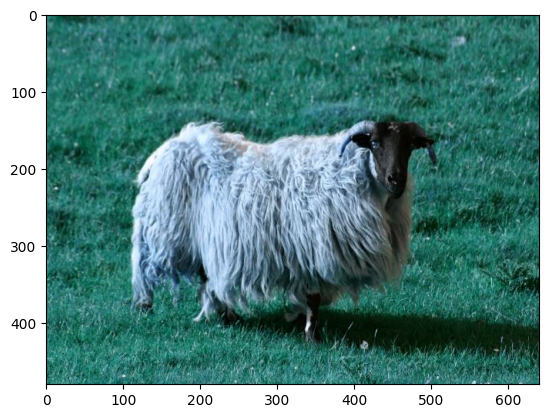

456 108_0894.JPG


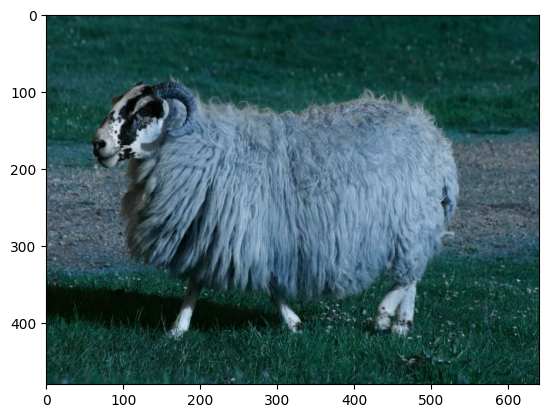

465 109_0905.JPG


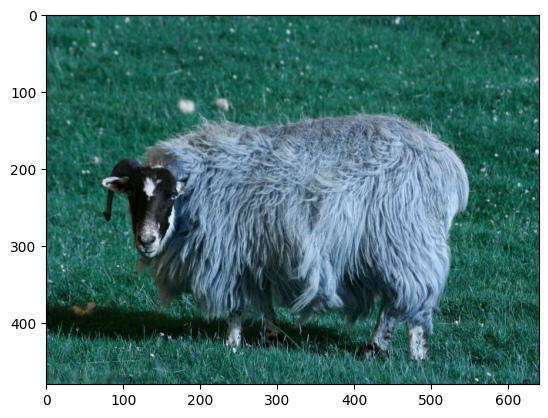

3467 177_7747.JPG


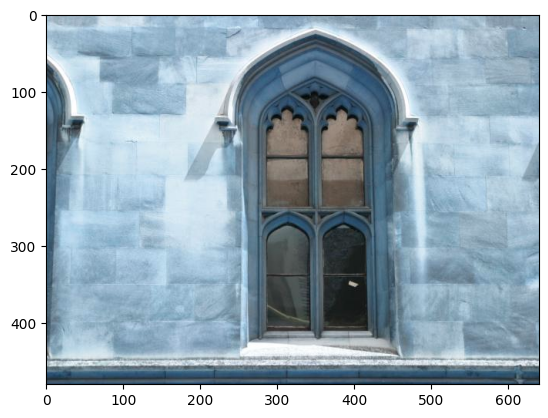

2614 158_5809.JPG


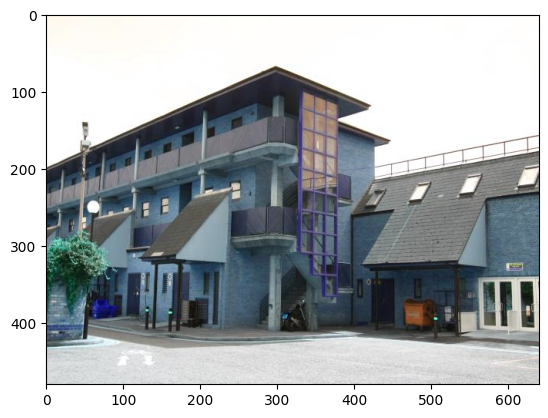

Images Close to the input
468 109_0908.JPG


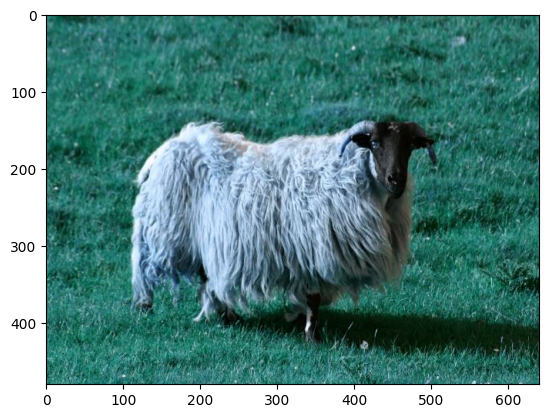

456 108_0894.JPG


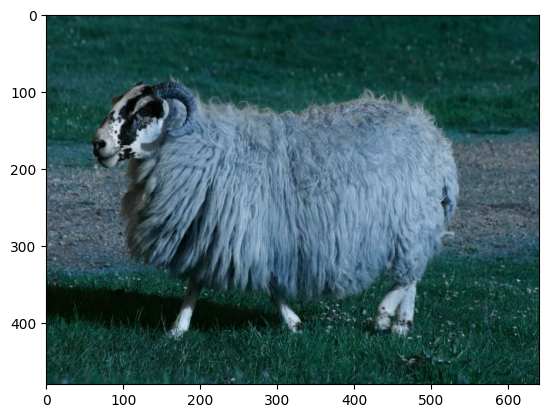

465 109_0905.JPG


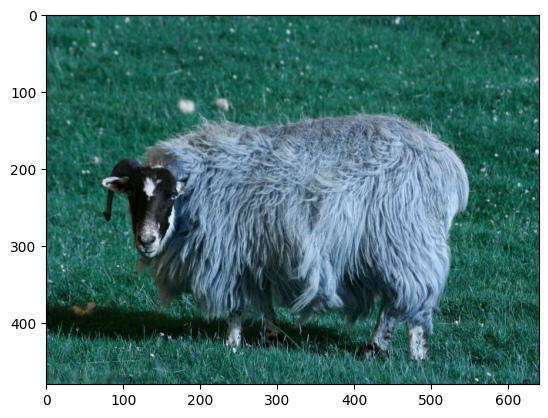

2 101_0110.JPG


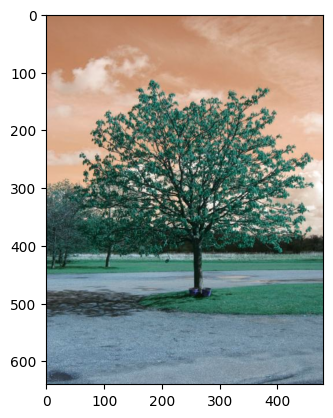

4060 184_8409.JPG


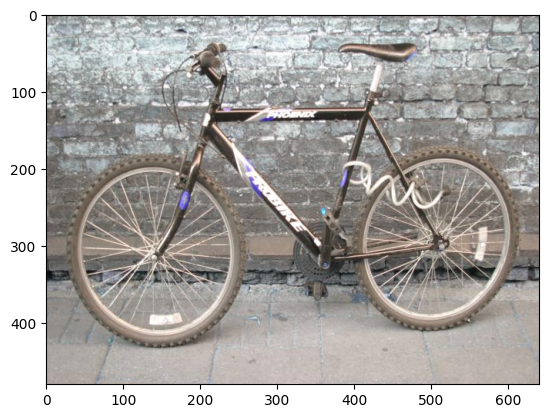

Images Close to the input
468 109_0908.JPG


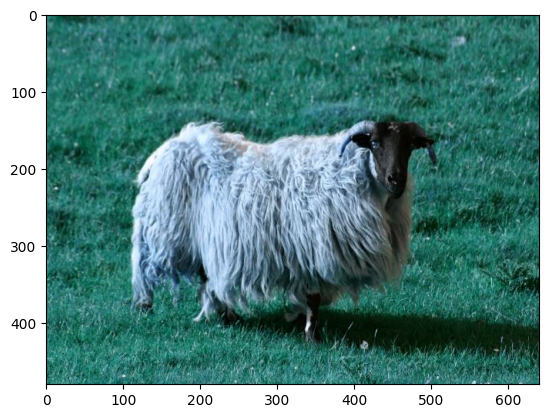

456 108_0894.JPG


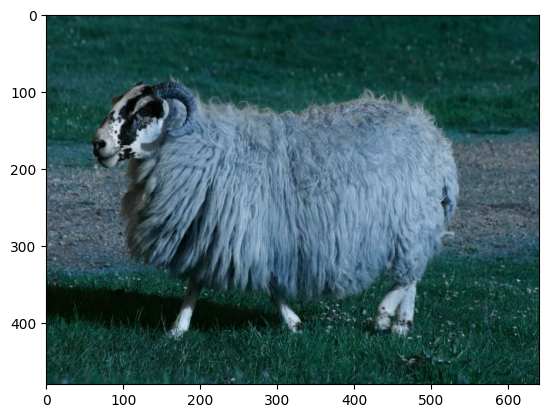

465 109_0905.JPG


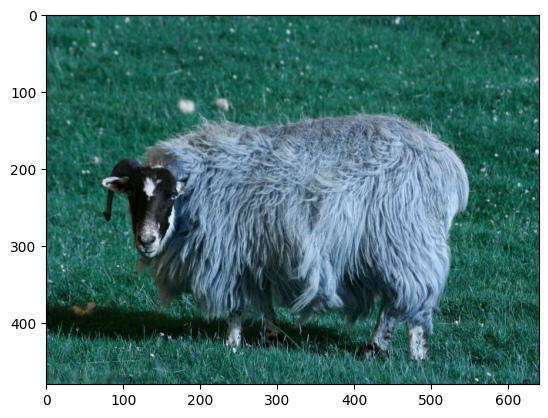

4058 184_8407.JPG


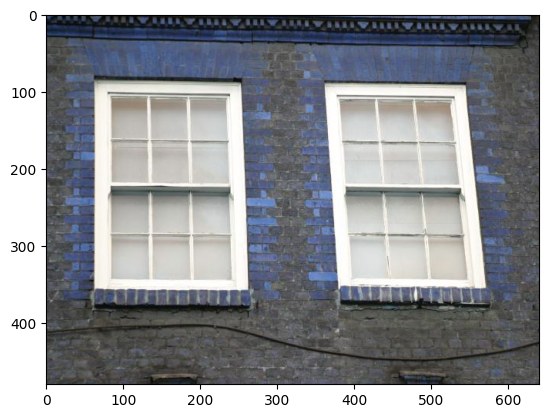

3199 166_6691.JPG


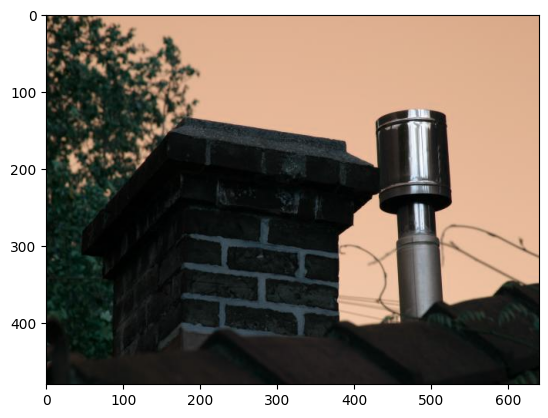

Images Close to the input
468 109_0908.JPG


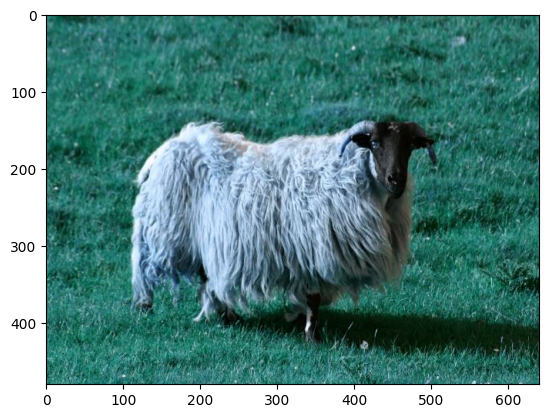

456 108_0894.JPG


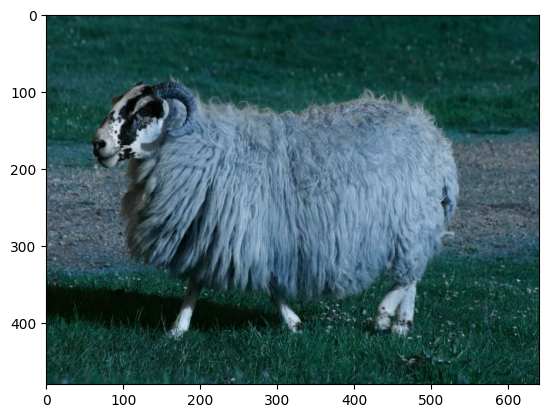

465 109_0905.JPG


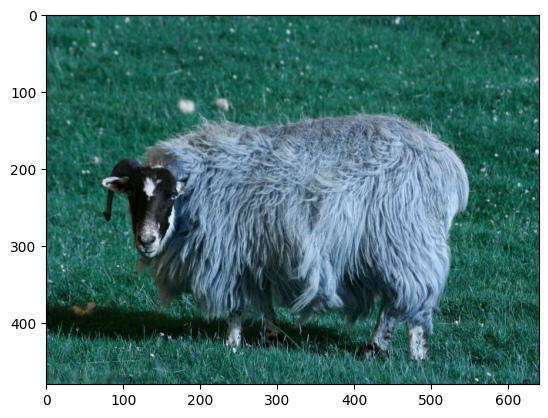

3199 166_6691.JPG


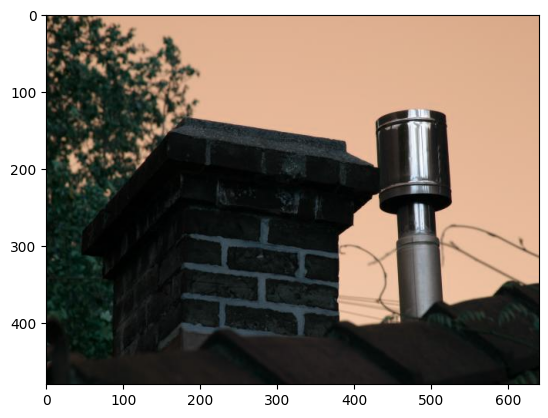

4056 184_8405.JPG


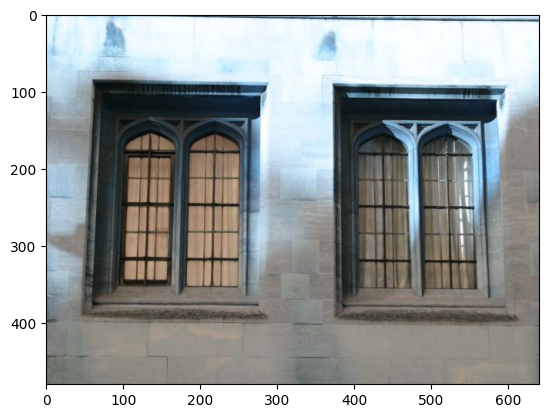

In [362]:
d = "notok"
selected_images = []
while(d!="ok"):
    nrst_neigh = NearestNeighbors(n_neighbors = 5 - len(selected_images))
    nrst_neigh.fit(copy_dataframe)
    distances, indices = nrst_neigh.kneighbors(test)
    print("Images Close to the input")
    for i in range (len(selected_images)):
        print(selected_images[i] , names[0][selected_images[i]])
        pov =  cv2.imread(f'./selectedimage/{names[0][selected_images[i]]}')
        plt.imshow(pov)
        plt.show()
    for i in range (len(indices[0])) :
        print(indices[0][i] , names[0][indices[0][i]])
        pov =  cv2.imread(f'./selectedimage/{names[0][indices[0][i]]}')
        plt.imshow(pov)
        plt.show()
        selected_images.append(indices[0][i])
        copy_names = copy_names.drop(indices[0][i])
        copy_dataframe = copy_dataframe.drop(indices[0][i])
    x = [int(x) for x in input("Enter multiple values: ").split()]
    for i in range (len(x)):
        selected_images.remove(x[i])
    r = random.randint(0, len(selected_images)-1)
    test = dataframe.truncate(before=selected_images[r], after=selected_images[r])
    if (x==[]) :
        d = "ok"

# SIFT

In [239]:
si = []
sift = cv2.SIFT_create()
for img in pictures :
    kp, des = sift.detectAndCompute(img, None)
    si.append(des)

In [284]:
test = cv2.imread('./selectedimage/112_1203.JPG')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test = cv2.medianBlur(test,5)
kp, test_des = sift.detectAndCompute(test, None)
test_des = test_des.astype('float32')
bf = cv2.BFMatcher(cv2.NORM_L1 , crossCheck = True)

In [285]:
matches = []
for i in range (len(si)):
    match = bf.match(test_des , si[i])
    sum = 0.0
    match = sorted(match , key = lambda x:x.distance)
    a = min([10 , len(match)])
    for j in range (a):
        sum = sum + match[j].distance
    if (len(si[i])>10):
        matches.append(sum)
    else : matches.append(10000000)

In [286]:
names = pd.DataFrame(name)
copy_names = names.copy()
copy_matches = matches.copy()

In [271]:
names[0][1234]

'120_2055.JPG'

In [256]:
matches[3300]

220062.04499053955

In [287]:
idx = np.argpartition(matches, 5)
idx[:5]

array([ 701, 1750, 2928, 1484, 1482], dtype=int64)

In [ ]:
d = "notok"
j = 0
selected_images = []
while(d!="ok"):
    selected_images = idx[:5]
    print("Images Close to the input")
    for i in range (len(selected_images)):
        print(selected_images[i] , names[0][selected_images[i]])
        pov =  cv2.imread(f'./selectedimage/{names[0][selected_images[i]]}')
        plt.imshow(pov)
        plt.show()
    x = [int(x) for x in input("Enter multiple values: ").split()]
    for i in range (len(x)):
        idx = np.delete(idx , x[i])
    if (x==[]) :
        d = "ok"

# Just texture

In [ ]:
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
ASM = []
contrast1 = []
dissimilarity1 = []
homogeneity1 = []
energy1 = []
correlation1 = []
ASM1 = []
contrast2 = []
dissimilarity2 = []
homogeneity2 = []
energy2 = []
correlation2 = []
ASM2 = []
contrast3 = []
dissimilarity3 = []
homogeneity3 = []
energy3 = []
correlation3 = []
ASM3 = []
for img in images:
    graycom = feature.greycomatrix(img, [1], [0], levels=256)
    # Find the GLCM properties
    contrast.append(feature.greycoprops(graycom, 'contrast'))
    dissimilarity.append(feature.greycoprops(graycom, 'dissimilarity'))
    homogeneity.append(feature.greycoprops(graycom, 'homogeneity'))
    energy.append(feature.greycoprops(graycom, 'energy'))
    correlation.append(feature.greycoprops(graycom, 'correlation'))
    ASM.append(feature.greycoprops(graycom, 'ASM'))

    graycom1 = feature.greycomatrix(img, [1], [np.pi/4], levels=256)
    # Find the GLCM properties
    contrast1.append(feature.greycoprops(graycom1, 'contrast'))
    dissimilarity1.append(feature.greycoprops(graycom1, 'dissimilarity'))
    homogeneity1.append(feature.greycoprops(graycom1, 'homogeneity'))
    energy1.append(feature.greycoprops(graycom1, 'energy'))
    correlation1.append(feature.greycoprops(graycom1, 'correlation'))
    ASM1.append(feature.greycoprops(graycom1, 'ASM'))

    graycom2 = feature.greycomatrix(img, [1], [np.pi/2], levels=256)
    # Find the GLCM properties
    contrast2.append(feature.greycoprops(graycom2, 'contrast'))
    dissimilarity2.append(feature.greycoprops(graycom2, 'dissimilarity'))
    homogeneity2.append(feature.greycoprops(graycom2, 'homogeneity'))
    energy2.append(feature.greycoprops(graycom2, 'energy'))
    correlation2.append(feature.greycoprops(graycom2, 'correlation'))
    ASM2.append(feature.greycoprops(graycom2, 'ASM'))

    graycom3 = feature.greycomatrix(img, [1], [3*np.pi/4], levels=256)
    # Find the GLCM properties
    contrast3.append(feature.greycoprops(graycom3, 'contrast'))
    dissimilarity3.append(feature.greycoprops(graycom3, 'dissimilarity'))
    homogeneity3.append(feature.greycoprops(graycom3, 'homogeneity'))
    energy3.append(feature.greycoprops(graycom3, 'energy'))
    correlation3.append(feature.greycoprops(graycom3, 'correlation'))
    ASM3.append(feature.greycoprops(graycom3, 'ASM'))

In [224]:
texture_df = pd.DataFrame({'energy' : energy , 'contrast' : contrast , 'ASM' : ASM , 'correlation' : correlation ,
                    'dissimilarity' : dissimilarity , 'homogenity' : homogeneity , 
                    'energy1' : energy1 , 'contrast1' : contrast1 , 'ASM1' : ASM1 , 'correlation1' : correlation1 ,
                    'dissimilarity1' : dissimilarity1 , 'homogenity1' : homogeneity1 , 
                    'energy2' : energy2 , 'contrast2' : contrast2 , 'ASM2' : ASM2 , 'correlation2' : correlation2 ,
                    'dissimilarity2' : dissimilarity2 , 'homogenity2' : homogeneity2 ,
                    'energy3' : energy3 , 'contrast3' : contrast3 , 'ASM3' : ASM3 , 'correlation3' : correlation3 ,
                    'dissimilarity3' : dissimilarity3 , 'homogenity3' : homogeneity3})
texture_df

energy                contrast  \
0      [[0.10945928560795952]]  [[1.7395865936358892]]   
1      [[0.08973873800501597]]   [[4.192644180584551]]   
2      [[0.04266692408558514]]  [[45.036019050104386]]   
3       [[0.0438826397488106]]  [[44.945818110647174]]   
4      [[0.03836826000353989]]  [[17.753896061554514]]   
...                        ...                     ...   
4140   [[0.05521145576426148]]   [[34.41396061554512]]   
4141    [[0.0536903776023071]]   [[35.52523474178403]]   
4142   [[0.03994173282263358]]  [[23.723050339071463]]   
4143  [[0.047434454158396616]]  [[14.198148148148148]]   
4144   [[0.09927692613493506]]   [[3.008982133541993]]   

                            ASM             correlation  \
0      [[0.011981335205804855]]  [[0.9996012815568952]]   
1      [[0.008053041098732899]]  [[0.9988670355114457]]   
2     [[0.0018204664109250854]]  [[0.9884196241343501]]   
3      [[0.001925686071323892]]  [[0.9907611643909369]]   
4     [[0.0014721233756992387]]  [[0.9950983244166923]]   
...                         ...                     ...   
4140  [[0.0030483048476090025]]  [[0.9950567763953013]]   
4141  [[0.0028826566470783197]]  [[0.9917594864323439]]   
4142  [[0.0015953420208746445]]  [[0.9935967194294553]]   
4143    [[0.00225002744130503]]  [[0.9929226091682957]]   
4144   [[0.009855908062801353]]  [[0.9977167761350275]]   

               dissimilarity              homogenity  \
0      [[0.522130933750652]]  [[0.8107494425202001]]   
1     [[0.8820165709812109]]  [[0.7362180737600658]]   
2      [[2.898316805845512]]  [[0.5479996720440017]]   
3     [[2.9843945720250526]]  [[0.5301429450026343]]   
4      [[2.297831898800209]]  [[0.5141585125559481]]   
...                      ...                     ...   
4140  [[1.7356285863328118]]  [[0.6326226119326901]]   
4141   [[2.043538080333855]]  [[0.6322819147030546]]   
4142   [[2.053051643192488]]  [[0.5363811245037782]]   
4143  [[1.9746870109546166]]  [[0.5281427721158009]]   
4144  [[0.7210778560250392]]  [[0.7790853196967705]]   

                       energy1               contrast1  \
0       [[0.1032994158519544]]   [[3.357052544914581]]   
1       [[0.0856903010630895]]   [[8.020612190890647]]   
2     [[0.031947681400982045]]   [[95.79296330056422]]   
3      [[0.03663447527965597]]    [[94.5710253168279]]   
4      [[0.03179415234773519]]   [[33.09330863398904]]   
...                        ...                     ...   
4140   [[0.04476040308977861]]   [[78.31347584462935]]   
4141   [[0.03569075756707307]]   [[83.87193912722448]]   
4142  [[0.036164767706797725]]  [[31.424436668724947]]   
4143   [[0.04384876494068534]]  [[20.540745750307927]]   
4144   [[0.09436550330912656]]  [[4.1684488746442945]]   

                           ASM1            correlation1  ...  \
0      [[0.010670769315355008]]  [[0.9992358450840424]]  ...   
1      [[0.007342827696282919]]  [[0.9978346491916003]]  ...   
2     [[0.0010206543468986539]]  [[0.9753999293507319]]  ...   
3     [[0.0013420847790157247]]  [[0.9805792786432795]]  ...   
4      [[0.001010868123510995]]  [[0.9908674986342273]]  ...   
...                         ...                     ...  ...   
4140   [[0.002003493684759463]]  [[0.9887670092176294]]  ...   
4141  [[0.0012738301757115838]]  [[0.9805718838615464]]  ...   
4142  [[0.0013078904232866394]]  [[0.9915198091567989]]  ...   
4143  [[0.0019227141868234758]]   [[0.989768931515971]]  ...   
4144   [[0.008904848214784777]]  [[0.9968390856884262]]  ...   

                           ASM2            correlation2  \
0      [[0.011703208725057585]]  [[0.9996570170722875]]   
1      [[0.007880117284664926]]   [[0.998667644495352]]   
2      [[0.001221840135851722]]  [[0.9845634974965957]]   
3     [[0.0015842138786368782]]  [[0.9885375669073403]]   
4     [[0.0013689222273509311]]  [[0.9950228819665436]]   
...                         ...                     ...   
4140   [[0.002739476818795464]]  [[0.9915689318966044]]   
4141  [

In [225]:
scaler3 = MinMaxScaler()
scaled3 = scaler3.fit_transform(texture_df)
texture_df = pd.DataFrame(scaled3, columns=texture_df.columns.tolist())
texture_df.head()

energy  contrast       ASM  correlation  dissimilarity  homogenity  \
0  0.116725  0.004686  0.018222     0.996790       0.051246    0.762653   
1  0.091490  0.011816  0.012077     0.989417       0.094323    0.657790   
2  0.031258  0.130519  0.002327     0.884511       0.335671    0.392974   
3  0.032813  0.130256  0.002492     0.908023       0.345975    0.367850   
4  0.025757  0.051229  0.001782     0.951574       0.263794    0.345361   

    energy1  contrast1      ASM1  correlation1  ...      ASM2  correlation2  \
0  0.114071   0.003894  0.016442      0.996709  ...  0.017758      0.997642   
1  0.091632   0.009776  0.011221      0.988755  ...  0.011806      0.988738   
2  0.023147   0.120465  0.001303      0.861398  ...  0.001439      0.861795   
3  0.029120   0.118924  0.001807      0.890800  ...  0.002004      0.897563   
4  0.022952   0.041395  0.001288      0.949204  ...  0.001668      0.955933   

   dissimilarity2  homogenity2   energy3  contrast3      ASM3  correlation3  \
0        0.033253     0.775113  0.113874   0.003230  0.016561      0.997257   
1        0.077978     0.625027  0.089155   0.011647  0.010841      0.987277   
2        0.325077     0.279483  0.021900   0.119713  0.001243      0.873753   
3        0.298121     0.321385  0.025866   0.111737  0.001567      0.905902   
4        0.196204     0.333569  0.022657   0.039986  0.001302      0.954790   

   dissimilarity3  homogenity3  
0        0.041807     0.749722  
1        0.095364     0.605893  
2        0.362937     0.267504  
3        0.349806     0.287631  
4        0.245198     0.281927  

[5 rows x 24 columns]

In [226]:
names = pd.DataFrame(name)
copy_names = names.copy()
copy_texturedf = texture_df.copy()
copy_names

0
0             101_0108.JPG
1             101_0109.JPG
2             101_0110.JPG
3             101_0111.JPG
4             101_0112.JPG
...                    ...
4140          184_8498.JPG
4141          185_8503.JPG
4142  Copy of 109_0999.JPG
4143  Copy of 113_1380.JPG
4144  Copy of 113_1384.JPG

[4145 rows x 1 columns]

In [230]:
f = names.index[names[0] == "175_7534.JPG"].tolist()
f

[3257]

In [231]:
test = texture_df.truncate(before=3257, after=3257)
test

energy  contrast       ASM  correlation  dissimilarity  homogenity  \
3257  0.051926  0.118003  0.004892     0.817217        0.25273    0.375876   

       energy1  contrast1      ASM1  correlation1  ...      ASM2  \
3257  0.040857   0.084341  0.002999       0.83022  ...  0.004201   

      correlation2  dissimilarity2  homogenity2   energy3  contrast3  \
3257      0.883029        0.202707      0.33728  0.040595   0.088603   

          ASM3  correlation3  dissimilarity3  homogenity3  
3257  0.003035      0.836607        0.272967     0.264925  

[1 rows x 24 columns]

In [232]:
d = "notok"
selected_images = []
while(d!="ok"):
    nrst_neigh = NearestNeighbors(n_neighbors = 5 - len(selected_images))
    nrst_neigh.fit(copy_texturedf)
    distances, indices = nrst_neigh.kneighbors(test)
    print("Images Close to the input")
    for i in range (len(selected_images)):
        print(selected_images[i] , names[0][selected_images[i]])
    for i in range (len(indices[0])) :
        print(indices[0][i] , names[0][indices[0][i]])
        selected_images.append(indices[0][i])
        copy_names = copy_names.drop(indices[0][i])
        copy_texturedf = copy_texturedf.drop(indices[0][i])
    x = [int(x) for x in input("Enter multiple values: ").split()]
    for i in range (len(x)):
        selected_images.remove(x[i])
    r = random.randint(0, len(selected_images)-1)
    test = texture_df.truncate(before=selected_images[r], after=selected_images[r])
    if (x==[]) :
        d = "ok"

Images Close to the input
3252 175_7529.JPG
2642 158_5843.JPG
1644 125_2517.JPG
3051 164_6427.JPG
3446 177_7726.JPG


# Shape

In [58]:
threshhold = []
for img in background:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # global thresholding
    ret1,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,110,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    threshhold.append(th2)
    # plot all the images and their histograms
    s = [img, 0, th1,
            img, 0, th2]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=130)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding"]
    #for i in range(2):
    #    plt.subplot(3,3,i*3+1),plt.imshow(s[i*3],'gray')
    #    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #    plt.subplot(3,3,i*3+2),plt.hist(s[i*3].ravel(),256)
    #    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #    plt.subplot(3,3,i*3+3),plt.imshow(s[i*3+2],'gray')
    #    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    #plt.show()

In [59]:
props = []
for th in threshhold:
    props.append(measure.regionprops_table(
        th, properties=['axis_major_length', 'axis_minor_length'
                            ,'eccentricity','euler_number', 'extent', 'solidity']))
df1 = pd.DataFrame.from_dict(props)

In [60]:
df1 = df1.astype(float)
scaler4 = MinMaxScaler()
scaled4 = scaler4.fit_transform(df1)
shape_df = pd.DataFrame(scaled4, columns=df1.columns.tolist())
shape_df.head()

axis_major_length  axis_minor_length  eccentricity  euler_number    extent  \
0           0.364985           0.483570      0.592348      0.379714  0.664930   
1           0.131164           0.155546      0.690287      0.381014  0.566281   
2           0.310536           0.323994      0.768431      0.237971  0.514267   
3           0.321275           0.458704      0.503556      0.265280  0.500570   
4           0.428959           0.486276      0.720183      0.319896  0.721865   

   solidity  
0  0.889119  
1  0.780707  
2  0.670322  
3  0.653405  
4  0.888193

In [115]:
f = names.index[names[0] == "157_5797.JPG"].tolist()
f

[2604]

In [116]:
test = shape_df.truncate(before=2604, after=2604)
test

axis_major_length  axis_minor_length  eccentricity  euler_number  \
2604           0.329654           0.527429        0.2944      0.384915   

        extent  solidity  
2604  0.260143  0.305364

In [117]:
names = pd.DataFrame(name)
copy_names = names.copy()
copy_shapedf = shape_df.copy()
copy_names

0
0             101_0108.JPG
1             101_0109.JPG
2             101_0110.JPG
3             101_0111.JPG
4             101_0112.JPG
...                    ...
4140          184_8498.JPG
4141          185_8503.JPG
4142  Copy of 109_0999.JPG
4143  Copy of 113_1380.JPG
4144  Copy of 113_1384.JPG

[4145 rows x 1 columns]

In [118]:
d = "notok"
selected_images = []
while(d!="ok"):
    nrst_neigh = NearestNeighbors(n_neighbors = 5 - len(selected_images))
    nrst_neigh.fit(copy_shapedf)
    distances, indices = nrst_neigh.kneighbors(test)
    print("Images Close to the input")
    for i in range (len(selected_images)):
        print(selected_images[i] , names[0][selected_images[i]])
    for i in range (len(indices[0])) :
        print(indices[0][i] , names[0][indices[0][i]])
        selected_images.append(indices[0][i])
        copy_names = copy_names.drop(indices[0][i])
        copy_shapedf = copy_shapedf.drop(indices[0][i])
    x = [int(x) for x in input("Enter multiple values: ").split()]
    for i in range (len(x)):
        selected_images.remove(x[i])
    r = random.randint(0, len(selected_images)-1)
    test = shape_df.truncate(before=selected_images[r], after=selected_images[r])
    if (x==[]) :
        d = "ok"

Images Close to the input
2604 157_5797.JPG
3644 179_7928.JPG
1582 124_2455.JPG
3412 176_7692.JPG
2583 157_5775.JPG
